### Importação e carregamento de Dados

In [81]:
# Bibliotecas basicas
import pandas as pd
import matplotlib.pyplot as plt

# Importando os dados
df = pd.read_csv('mobile_phone_usage/mobile phone usage .csv')

### Modificação das colunas

In [82]:
# Alterando nome da coluna 'ï»¿name' para 'name'
df.rename(columns={'ï»¿name': 'name'}, inplace=True)

# Alterando o nome da coluna 'value' para 'quantidade_em_uso'
df.rename(columns={'value': 'quantidade_em_uso'}, inplace=True)

# Transformando a coluna 'ranking' para o tipo 'object'
df['ranking'] = df['ranking'].astype('object')

# Transformando a coluna 'quantidade_em_uso' para o tipo 'int64'
df['quantidade_em_uso'] = df['quantidade_em_uso'].str.replace(',', '').astype('int64')

df.head(10)

,name,slug,quantidade_em_uso,date_of_information,ranking,region
0,China,china,1810000000,2023,1,East and Southeast Asia
1,India,india,1140000000,2022,2,South Asia
2,United States,united-states,386000000,2023,3,North America
3,Indonesia,indonesia,352000000,2023,4,East and Southeast Asia
4,Russia,russia,245000000,2022,5,Central Asia
5,Nigeria,nigeria,224000000,2023,6,Africa
6,Japan,japan,219000000,2023,7,East and Southeast Asia
7,Brazil,brazil,213000000,2023,8,South America
8,Bangladesh,bangladesh,191000000,2023,9,South Asia
9,Pakistan,pakistan,189000000,2023,10,South Asia


### Checagem de Saúde da Base de Dados

In [42]:
# Checagem de saúde da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 225 non-null    object
 1   slug                 225 non-null    object
 2   quantidade_em_uso    225 non-null    int64 
 3   date_of_information  225 non-null    int64 
 4   ranking              225 non-null    object
 5   region               225 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.7+ KB


In [ ]:
# Descrição estatística dos dados
df.describe()

,quantidade_em_uso,date_of_information
count,2.250000e+02,225.000000
mean,3.911035e+07,2022.075556
std,1.498258e+08,2.492592
min,0.000000e+00,2004.000000
25%,7.520000e+05,2022.000000
50%,7.050000e+06,2023.000000
75%,2.380000e+07,2023.000000
max,1.810000e+09,2023.000000


In [20]:
# Checando valores nulos
df.isnull().sum()

name                   0
slug                   0
value                  0
date_of_information    0
ranking                0
region                 0
dtype: int64

In [ ]:
# Checando valores duplicados
df.duplicated().sum()

np.int64(0)

🔍 Cuidados com Valores Duplicados
É importante verificar se há valores duplicados no conjunto de dados, pois isso pode impactar negativamente as análises.

No entanto, como não foram encontrados registros duplicados, não é necessário adicionar uma coluna de ID. Os nomes dos países já são únicos e podem ser utilizados como identificador principal.

### Região por uso de celulares

In [50]:
df_region = df.groupby('region')['quantidade_em_uso'].sum().reset_index()
df_region = df_region.sort_values(by='quantidade_em_uso', ascending=True)

df_region

,region,quantidade_em_uso
1,Australia and Oceania,38456724
2,Central America and the Caribbean,98779765
3,Central Asia,354700000
6,Middle East,454030000
8,South America,495421000
7,North America,562635000
5,Europe,747945427
0,Africa,1360762000
9,South Asia,1612697000
4,East and Southeast Asia,3074401000


<BarContainer object of 10 artists>

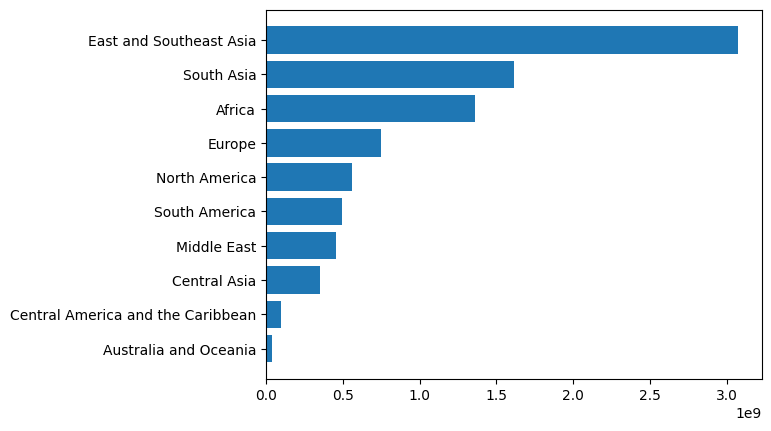

In [51]:
plt.barh(df_region['region'], df_region['quantidade_em_uso'])

### Ano que teve maior uso de celulares

In [83]:
df_year = df.groupby('date_of_information')['quantidade_em_uso'].sum().reset_index()
df_year = df_year.sort_values(by='date_of_information', ascending=True)

df_year

,date_of_information,quantidade_em_uso
0,2004,45559
1,2009,100250
2,2012,137680
3,2018,0
4,2020,5000
5,2021,168142568
6,2022,1722196859
7,2023,6909200000


In [84]:
df[df['date_of_information'] == 2018]


,name,slug,quantidade_em_uso,date_of_information,ranking,region
224,Wallis and Futuna,wallis-and-futuna,0,2018,225,Australia and Oceania


Em 2018, a fonte Digital in 2018 – East Oceania (baseada em dados da GSMA Intelligence no final de 2017) indica que Wallis e Futuna tinha cerca de 8.492 conexões móveis — o que representa 76% da população do território na época

📌 **Contexto e interpretação**
- **Essas 8.492 “conexões” referem-se a linhas ativas (SIM cards)**, e não ao número de pessoas. Em muitos lugares, uma pessoa pode ter mais de uma conexão (por exemplo, planos pessoais e de trabalho).

- Já o CIA World Factbook para 2018 registra **“0 subscrições móveis”**, indicando que, naquele ano, **talvez** não havia serviços oficiais disponíveis ou **deteção falhou**, possivelmente até antes da rede “Manuia” ter sido implantada e reconhecida. Essa discrepância pode refletir diferentes métodos de coleta ou cronologias implantação do serviço.

In [ ]:
# Por essa informação decide substituir o valor de 0 por 8492, 
# que é o valor da quantidade de celulares em uso no ano de 2018
df.loc[df['date_of_information'] == 2018, 'quantidade_em_uso'] = 8492

In [87]:
# Checando novamente os dados para ver se o valor foi alterado

df_year = df.groupby('date_of_information')['quantidade_em_uso'].sum().reset_index()
df_year = df_year.sort_values(by='date_of_information', ascending=True)

df_year

,date_of_information,quantidade_em_uso
0,2004,45559
1,2009,100250
2,2012,137680
3,2018,8492
4,2020,5000
5,2021,168142568
6,2022,1722196859
7,2023,6909200000


### Quantidade de paises que foram registrados em cada ano